# Ingenieria de atributos

In [1]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Cantidad de filas en el dataset: 1523221

Porcentaje de clics (1) y no clics (0):
Label
0    98.566918
1     1.433082
Name: proportion, dtype: float64

Cantidad de clics (1) y no clics (0):
Label
0    1501392
1      21829
Name: count, dtype: int64


/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


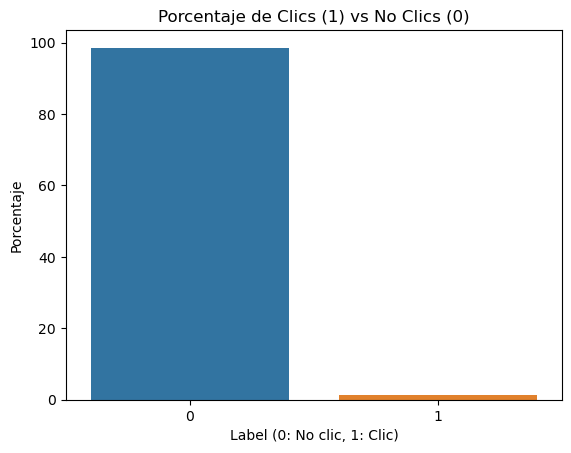


Correlación de atributos numéricos con Label:
auction_age: Correlación con Label = -0.0061
auction_bidfloor: Correlación con Label = 0.0880
auction_time: Correlación con Label = -0.0197
creative_height: Correlación con Label = 0.1085
creative_width: Correlación con Label = 0.0576
timezone_offset: Correlación con Label = 0.0240

Relación de atributos categóricos con Label (distribución de Label por categoría):

Distribución de Label por categorías en action_categorical_0:
Label                        0         1
action_categorical_0                    
11b7af3d              0.991519  0.008481
604d011f              0.977846  0.022154
6b5513a4              0.978230  0.021770
7f02cacc              0.988586  0.011414
9915ffee              0.986867  0.013133
c186959e              0.840409  0.159591
c202ab08              0.991081  0.008919
c2e4f717              0.994273  0.005727
e350c7c7              0.984131  0.015869
Cantidad de filas por categorías en action_categorical_0:
action_categor

In [8]:
# Cargar los datos de entrenamiento
train_data_21 = pd.read_csv("data/ctr_21.csv")

# Imprimir la cantidad de filas del dataset
print(f"Cantidad de filas en el dataset: {train_data_21.shape[0]}")

# Ver porcentaje de clics vs no clics en la columna Label
label_counts = train_data_21['Label'].value_counts(normalize=True) * 100
print("\nPorcentaje de clics (1) y no clics (0):")
print(label_counts)

# Cantidad de clics (1) y no clics (0)
label_counts_abs = train_data_21['Label'].value_counts()
print("\nCantidad de clics (1) y no clics (0):")
print(label_counts_abs)

# Visualización
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Porcentaje de Clics (1) vs No Clics (0)")
plt.ylabel("Porcentaje")
plt.xlabel("Label (0: No clic, 1: Clic)")
plt.show()

# Dividir los datos en numéricos y categóricos
numeric_features = train_data_21.select_dtypes(include=['number']).columns.tolist()
categorical_features = train_data_21.select_dtypes(include=['object']).columns.tolist()

# Relación de cada atributo numérico con la columna Label
print("\nCorrelación de atributos numéricos con Label:")
for feature in numeric_features:
    if feature != 'Label':
        correlation = train_data_21[[feature, 'Label']].corr().iloc[0, 1]
        print(f"{feature}: Correlación con Label = {correlation:.4f}")

# Relación de cada atributo categórico con la columna Label
print("\nRelación de atributos categóricos con Label (distribución de Label por categoría):")
for feature in categorical_features:
    if feature != 'Label':
        print(f"\nDistribución de Label por categorías en {feature}:")
        print(train_data_21.groupby(feature)['Label'].value_counts(normalize=True).unstack())
        # También mostrar la cantidad de filas por categoría
        print(f"Cantidad de filas por categorías en {feature}:")
        print(train_data_21.groupby(feature)['Label'].size())

Cantidad de filas en el dataset: 1356066

Porcentaje de clics (1) y no clics (0):
Label
0    98.493731
1     1.506269
Name: proportion, dtype: float64

Cantidad de clics (1) y no clics (0):
Label
0    1335640
1      20426
Name: count, dtype: int64


/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


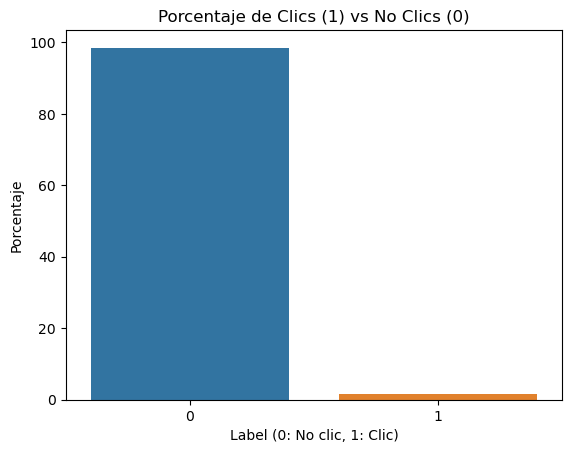


Correlación de atributos numéricos con Label:
auction_age: Correlación con Label = -0.0067
auction_bidfloor: Correlación con Label = 0.0863
auction_time: Correlación con Label = -0.0179
creative_height: Correlación con Label = 0.1031
creative_width: Correlación con Label = 0.0602
timezone_offset: Correlación con Label = 0.0258

Relación de atributos categóricos con Label (distribución de Label por categoría):

Distribución de Label por categorías en action_categorical_0:
Label                        0         1
action_categorical_0                    
11b7af3d              0.990711  0.009289
604d011f              0.979335  0.020665
6b5513a4              0.975761  0.024239
7f02cacc              0.987924  0.012076
9915ffee              0.986712  0.013288
c186959e              0.840936  0.159064
c202ab08              0.992327  0.007673
c2e4f717              0.991343  0.008657
e350c7c7              0.983703  0.016297
Cantidad de filas por categorías en action_categorical_0:
action_categor

In [9]:
# Cargar los datos de entrenamiento
train_data_20 = pd.read_csv("data/ctr_20.csv")

# Imprimir la cantidad de filas del dataset
print(f"Cantidad de filas en el dataset: {train_data_20.shape[0]}")

# Ver porcentaje de clics vs no clics en la columna Label
label_counts = train_data_20['Label'].value_counts(normalize=True) * 100
print("\nPorcentaje de clics (1) y no clics (0):")
print(label_counts)

# Cantidad de clics (1) y no clics (0)
label_counts_abs = train_data_20['Label'].value_counts()
print("\nCantidad de clics (1) y no clics (0):")
print(label_counts_abs)

# Visualización
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Porcentaje de Clics (1) vs No Clics (0)")
plt.ylabel("Porcentaje")
plt.xlabel("Label (0: No clic, 1: Clic)")
plt.show()

# Dividir los datos en numéricos y categóricos
numeric_features = train_data_20.select_dtypes(include=['number']).columns.tolist()
categorical_features = train_data_20.select_dtypes(include=['object']).columns.tolist()

# Relación de cada atributo numérico con la columna Label
print("\nCorrelación de atributos numéricos con Label:")
for feature in numeric_features:
    if feature != 'Label':
        correlation = train_data_20[[feature, 'Label']].corr().iloc[0, 1]
        print(f"{feature}: Correlación con Label = {correlation:.4f}")

# Relación de cada atributo categórico con la columna Label
print("\nRelación de atributos categóricos con Label (distribución de Label por categoría):")
for feature in categorical_features:
    if feature != 'Label':
        print(f"\nDistribución de Label por categorías en {feature}:")
        print(train_data_20.groupby(feature)['Label'].value_counts(normalize=True).unstack())
        # También mostrar la cantidad de filas por categoría
        print(f"Cantidad de filas por categorías en {feature}:")
        print(train_data_20.groupby(feature)['Label'].size())

Cantidad de filas en el dataset: 1326180

Porcentaje de clics (1) y no clics (0):
Label
0    98.535644
1     1.464356
Name: proportion, dtype: float64

Cantidad de clics (1) y no clics (0):
Label
0    1306760
1      19420
Name: count, dtype: int64


/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


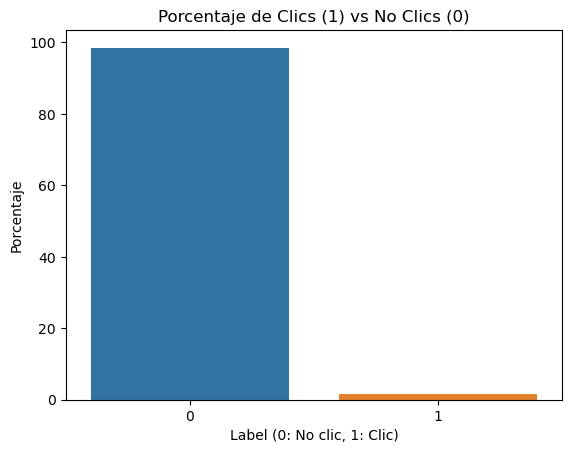


Correlación de atributos numéricos con Label:
auction_age: Correlación con Label = -0.0093
auction_bidfloor: Correlación con Label = 0.0825
auction_time: Correlación con Label = 0.0089
creative_height: Correlación con Label = 0.0862
creative_width: Correlación con Label = 0.0479
timezone_offset: Correlación con Label = 0.0346

Relación de atributos categóricos con Label (distribución de Label por categoría):

Distribución de Label por categorías en action_categorical_0:
Label                        0         1
action_categorical_0                    
11b7af3d              0.991731  0.008269
604d011f              0.975146  0.024854
6b5513a4              0.976321  0.023679
7f02cacc              0.987786  0.012214
9915ffee              0.987787  0.012213
c186959e              0.848703  0.151297
c202ab08              0.992305  0.007695
c2e4f717              0.991568  0.008432
e350c7c7              0.983370  0.016630
Cantidad de filas por categorías en action_categorical_0:
action_categori

In [10]:
# Cargar los datos de entrenamiento
train_data_19 = pd.read_csv("data/ctr_19.csv")

# Imprimir la cantidad de filas del dataset
print(f"Cantidad de filas en el dataset: {train_data_19.shape[0]}")

# Ver porcentaje de clics vs no clics en la columna Label
label_counts = train_data_19['Label'].value_counts(normalize=True) * 100
print("\nPorcentaje de clics (1) y no clics (0):")
print(label_counts)

# Cantidad de clics (1) y no clics (0)
label_counts_abs = train_data_19['Label'].value_counts()
print("\nCantidad de clics (1) y no clics (0):")
print(label_counts_abs)

# Visualización
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Porcentaje de Clics (1) vs No Clics (0)")
plt.ylabel("Porcentaje")
plt.xlabel("Label (0: No clic, 1: Clic)")
plt.show()

# Dividir los datos en numéricos y categóricos
numeric_features = train_data_19.select_dtypes(include=['number']).columns.tolist()
categorical_features = train_data_19.select_dtypes(include=['object']).columns.tolist()

# Relación de cada atributo numérico con la columna Label
print("\nCorrelación de atributos numéricos con Label:")
for feature in numeric_features:
    if feature != 'Label':
        correlation = train_data_19[[feature, 'Label']].corr().iloc[0, 1]
        print(f"{feature}: Correlación con Label = {correlation:.4f}")

# Relación de cada atributo categórico con la columna Label
print("\nRelación de atributos categóricos con Label (distribución de Label por categoría):")
for feature in categorical_features:
    if feature != 'Label':
        print(f"\nDistribución de Label por categorías en {feature}:")
        print(train_data_19.groupby(feature)['Label'].value_counts(normalize=True).unstack())
        # También mostrar la cantidad de filas por categoría
        print(f"Cantidad de filas por categorías en {feature}:")
        print(train_data_19.groupby(feature)['Label'].size())